In [2]:
# pip install scitools3
# pip install numpy

815845
32766.999999728476
-32766.99999755628


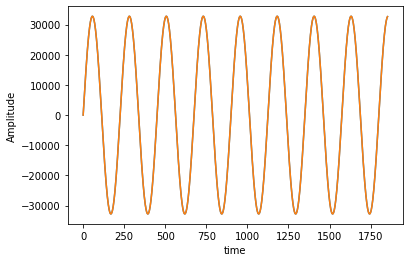

In [1]:
# HapyBirthday-DoReMi
# step-1 Define Python Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scitools.sound

# step-2 Define Function for Generate Note
# Generate Note Tones
def noteGenerator(frequency=440, length=0.2, amplitude=1, sample_rate=44100):
    timepoints = np.linspace(0, length, int(length*sample_rate))
    data = amplitude*np.sin(2*np.pi*frequency*timepoints)  # A*sin(2*π*f*t)
    return data

# step-3 Define Note letters and Frequencies via 'ScaleFreqs.csv' for Using
df = pd.read_csv('ScaleFreqs.csv', decimal =',')

# step-4 Define Samle Composition Sheet
# Syntax for two notes: '''Note-time(Space)Note-time'''
composition_letters = """
G3-0.4 G3-0.4 A3-0.8 G3-0.8 C4-0.7 B3-1.5 
G3-0.4 G3-0.4 A3-0.8 G3-0.8 D4-0.7 C4-1.4 
G3-0.4 G3-0.4 G4-0.7 E4-0.7 C4-0.8 D4-0.8 E4-0.8
F4-0.4 F4-0.4 E4-0.8 C4-0.8 D4-0.8 C4-1.6 
"""  # Happy Birthday to You - DoReMi-CDE

# step-5 Generate all tone from defined Composition
comp_letters_list = composition_letters.split()
tones = []
for letter in comp_letters_list:
    note, duration = letter.split('-')
    if note.title() in df['notes'].values:
        s = noteGenerator(df.loc[df['notes']==note.upper()]['frequency'].values[0], float(duration))
        tones.append(s)
    elif note.title() in df['notesDO'].values:
        s = noteGenerator(df.loc[df['notesDO']==note.upper()]['frequency'].values[0], float(duration))
        tones.append(s)
    else:
        print('Someting is wrong! Check and Try Again.')
        pass

# step-6 Make Note Data into a Single Array 
tones_wave = (np.concatenate(tones)*(np.iinfo(np.int16).max))  # Amplitude run 1 time

# step-7 Make Single Array into Double for Stereo Sound
# A 2D array where the left and right tones are contained in their respective rows
tones_wave_stereo = np.vstack((tones_wave, tones_wave))

# step-8 Make double array available for registration
# Reshape 2D array so that the left and right tones are contained in their respective columns
tones_wave_stereo = tones_wave_stereo.transpose()

# step-9 Save to Local Folder
scitools.sound.write(data=tones_wave_stereo, filename="Hapy-Birthday-DoReMi-Python-MuCe.wav", sample_rate=44100)

# step-10 Analyze tones_wave_stereo features
print(len(tones_wave_stereo))
print(np.max(tones_wave_stereo))
print(np.min(tones_wave_stereo))

plt.plot(tones_wave_stereo[0:int(815845/440)])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()